# Data Analysis of the Chicago Dataset

In this Jupyter Notebook we will analyze a bike sharing dataset of the city Chicago of the year 2019. We will also include the hourly weather data of the city during the same time. In the first part we will visualize the data and try to develop a deep understanding of the user types and recurring bahavioral patterns. In the second part we use this knowledge to develop a predicition model which forecasts future demand.

## Getting started: importing the data and getting it in the right format

At first we import all of the required libraries in this notebook. In this case we import *NumPy, Pandas, Matplotlib and Seaborn*. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Next we import the datasets. This is in perticular the dataset of the city Chicago of the year 2019 and the associated weather data. We do this with the library Pandas, therefore both datasets have now the datatype "Pandas Dataframe" ([documentation](https://pandas.pydata.org/docs/reference/frame.html)). 

The first cell is fore importing the files from the Google Drive when working with Google Colab, the second one is for importing the cells when working with a local Jupyter Notebook with    the files in the same folder as the Jupyter Notebook.

In [ ]:
# für Google Colab
from google.colab import drive
drive.mount('/content/drive')
chicago_set = pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/chicago_2019.csv')
weather_set = pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/weather_hourly_chicago.csv')
coordinates_sets = [pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202004-divvy-tripdata.csv')]
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202005-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202006-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202007-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202008-divvy-tripdata.csv'))

Mounted at /content/drive


In [ ]:
# für lokale Jupyter Notebooks
chicago_set = pd.read_csv('chicago_2019.csv')
weather_set = pd.read_csv('weather_hourly_chicago.csv')
coordinates_sets = [pd.read_csv('202004-divvy-tripdata.csv')]
coordinates_sets.append(pd.read_csv('202005-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202006-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202007-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202008-divvy-tripdata.csv'))

FileNotFoundError: ignored

We use the commands head() and info() to get a feeling for the data

In [ ]:
chicago_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber


In [ ]:
chicago_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.0+ MB


So we know that we have a dataset with 3.8 million entries and we have multiple columns, two columns for the time (*start_time and end_time*), four columns for the location (*start_station_id, end_station_id and the respective names*) and the *bike_id* and *user_type*. 

In [ ]:
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


We first investigate the time data we got. Therefore, we need to transform the data type of the columns "*start_time*" and "*end_time*" from String to Panda Datetime. This allows us in the following code snippet to add another column to our dataframe which we call *duration*. This is the difference between the end_time and the start_time. 

In [ ]:
chicago_set['start_time'] = pd.to_datetime(chicago_set['start_time'])
chicago_set['end_time'] = pd.to_datetime(chicago_set['end_time'])

chicago_set['duration'] = chicago_set['end_time'] - chicago_set['start_time']
chicago_set.describe()

,start_station_id,end_station_id,bike_id,duration
count,3.818004e+06,3.818004e+06,3.818004e+06,3818004
mean,2.016659e+02,2.026363e+02,3.380252e+03,0 days 00:24:10.451397903
std,1.560798e+02,1.562388e+02,1.902511e+03,0 days 08:17:32.263421746
min,1.000000e+00,1.000000e+00,1.000000e+00,-1 days +23:03:38
25%,7.700000e+01,7.700000e+01,1.727000e+03,0 days 00:06:51
50%,1.740000e+02,1.740000e+02,3.451000e+03,0 days 00:11:49
75%,2.890000e+02,2.910000e+02,5.046000e+03,0 days 00:21:24
max,6.730000e+02,6.730000e+02,6.946000e+03,123 days 01:20:22


We calculated the duration of the rides and see that the maximum duration of a ride was over 123 days. We can assume that there a other cases where the data is inconclusive, therefore we will clean our dataset and delete those wrong outliners.

### Cleaning up our data

### Examples of invalid data

In [ ]:
import datetime
chicago_set[chicago_set['duration'] >= datetime.timedelta(days=1)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
3036749,2019-09-25 10:54:09,2019-10-09 07:13:05,541,619,Central Ave & Harrison St,Keystone Ave & Fullerton Ave,288,Customer,13 days 20:18:56
1614742,2019-07-09 15:28:44,2019-07-10 22:29:53,172,166,Rush St & Cedar St,Ashland Ave & Wrightwood Ave,4874,Subscriber,1 days 07:01:09
3573141,2019-11-14 17:22:37,2019-11-18 01:10:55,261,444,Hermitage Ave & Polk St,Albany Ave & 26th St,658,Subscriber,3 days 07:48:18
1019469,2019-06-02 16:01:34,2019-06-03 16:06:55,447,242,Glenwood Ave & Morse Ave,Damen Ave & Leland Ave,2930,Customer,1 days 00:05:21
3738818,2019-12-13 12:57:09,2019-12-16 12:11:46,463,294,Clark St & Berwyn Ave,Broadway & Berwyn Ave,3665,Customer,2 days 23:14:37


In [ ]:
chicago_set[chicago_set['duration'] <= datetime.timedelta(days=0)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
3498446,2019-11-03 01:57:48,2019-11-03 01:01:26,340,300,Clark St & Wrightwood Ave,Broadway & Barry Ave,5310,Subscriber,-1 days +23:03:38
3498443,2019-11-03 01:53:24,2019-11-03 01:06:08,484,484,Monticello Ave & Irving Park Rd,Monticello Ave & Irving Park Rd,3984,Customer,-1 days +23:12:44
3498433,2019-11-03 01:46:01,2019-11-03 01:10:44,373,498,Kedzie Ave & Chicago Ave,California Ave & Fletcher St,6329,Customer,-1 days +23:24:43
3498435,2019-11-03 01:47:49,2019-11-03 01:02:40,229,87,Southport Ave & Roscoe St,Racine Ave & Fullerton Ave,964,Subscriber,-1 days +23:14:51
3498441,2019-11-03 01:53:08,2019-11-03 01:04:53,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,2142,Customer,-1 days +23:11:45


### Visualization of different quantile deletion of outlierts & invalid data from our data set

(0.125% Quantile) All trips with a duration outside of 0 days 00:01:19 to 0 days 09:01:02.970000002 will be removed!
That is 9263 out of 3818004 entries!


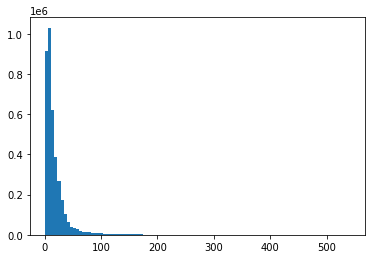

count                      3808741
mean     0 days 00:18:22.340564506
std      0 days 00:23:21.735330331
min                0 days 00:01:19
25%                0 days 00:06:52
50%                0 days 00:11:49
75%                0 days 00:21:21
max                0 days 09:00:59
Name: duration, dtype: object

(0.25% Quantile) All trips with a duration outside of 0 days 00:01:33 to 0 days 03:48:11.992500 will be removed!
That is 19025 out of 3818004 entries!


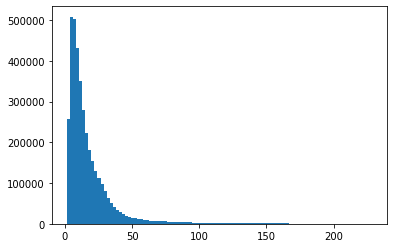

count                      3798979
mean     0 days 00:18:00.690816927
std      0 days 00:20:31.001258644
min                0 days 00:01:33
25%                0 days 00:06:53
50%                0 days 00:11:49
75%                0 days 00:21:19
max                0 days 03:48:11
Name: duration, dtype: object

(0.5% Quantile) All trips with a duration outside of 0 days 00:01:49 to 0 days 02:42:28 will be removed!
That is 37931 out of 3818004 entries!


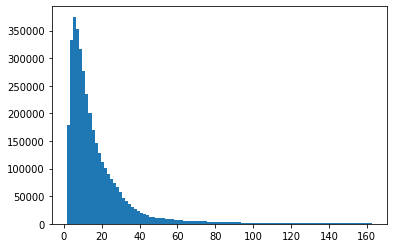

count                      3780073
mean     0 days 00:17:37.940601940
std      0 days 00:18:45.168339717
min                0 days 00:01:49
25%                0 days 00:06:54
50%                0 days 00:11:49
75%                0 days 00:21:15
max                0 days 02:42:28
Name: duration, dtype: object



In [ ]:
%matplotlib inline
# Data to remove from top and bottom
def get_outside_time_frame_data(df, dt_column, lower_bound, upper_bound):
    return df[(df[dt_column] < lower_bound) | (df[dt_column] > upper_bound)]

quantiles = [0.00125, 0.0025, 0.005] # (0.125%; 0.25%; 0.5%) * 2
for quantile in quantiles:
    # amount = len(chicago_set[(chicago_set['duration'] < chicago_set.duration.quantile(quantile)) | (chicago_set['duration'] > chicago_set.duration.quantile(1 - quantile))])
    lower_bound = chicago_set.duration.quantile(quantile)
    upper_bound = chicago_set.duration.quantile(1 - quantile)
    amount = get_outside_time_frame_data(chicago_set, 'duration', lower_bound, upper_bound)
    print('(' + str(quantile*100) + '% Quantile) All trips with a duration outside of ' + str(lower_bound) + ' to ' + str(upper_bound) + ' will be removed!')
    print('That is ' + str(len(amount)) + ' out of ' + str(len(chicago_set)) + ' entries!')
    chicago_set_clean = chicago_set.drop(amount.index)
    plt.hist(chicago_set_clean['duration']/pd.Timedelta(minutes=1), bins=100)
    plt.show()
    print(str(chicago_set_clean['duration'].describe()) + '\n')

### Find out the latitude and longitude of the stations

In [ ]:
coordinates_sets[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


### Get the relevant data, i.e. station_name, station_id, latitude & longitude

In [ ]:
coordinates = pd.DataFrame()
for coordinates_set in coordinates_sets:
    coordinates1 = coordinates_set[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']]
    coordinates2 = coordinates_set[['end_station_name', 'end_station_id', 'end_lat', 'end_lng']]

    coordinates1 = coordinates1.rename(columns={'start_station_name': 'station_name', 'start_station_id': 'station_id', 'start_lat': 'latitude', 'start_lng':'longitude'})
    coordinates2 = coordinates2.rename(columns={'end_station_name': 'station_name', 'end_station_id': 'station_id', 'end_lat': 'latitude', 'end_lng':'longitude'})

    coordinates_new = pd.concat([coordinates1, coordinates2], ignore_index = True)
    coordinates = pd.concat([coordinates, coordinates_new], ignore_index = True)
    print(coordinates_new['station_name'].nunique())
print(coordinates['station_name'].nunique())

607
611
619
622
636
647


In [ ]:
coordinates['station_id'] = coordinates['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_dropped = coordinates.dropna()
coordinates_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583982 entries, 0 to 3603791
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   station_name  object 
 1   station_id    float64
 2   latitude      float64
 3   longitude     float64
dtypes: float64(3), object(1)
memory usage: 136.7+ MB


#### Get all unique rows based on station_id

In [ ]:
coordinates_unique = coordinates_dropped.drop_duplicates(subset = ['station_id'], keep = 'last')
#coordinates_unique['station_id'] = coordinates_unique['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_unique = coordinates_unique.dropna()
coordinates_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1211447 to 3603791
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  634 non-null    object 
 1   station_id    634 non-null    float64
 2   latitude      634 non-null    float64
 3   longitude     634 non-null    float64
dtypes: float64(3), object(1)
memory usage: 24.8+ KB


In [ ]:
coordinates_unique = coordinates_unique[np.isfinite(coordinates_unique['station_id'])]
coordinates_unique['station_id'] = coordinates_unique['station_id'].astype('int64')
coordinates_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1211447 to 3603791
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  634 non-null    object 
 1   station_id    634 non-null    int64  
 2   latitude      634 non-null    float64
 3   longitude     634 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 24.8+ KB


In [ ]:
print(chicago_set_clean['start_station_id'].nunique())
print(chicago_set_clean['end_station_id'].nunique())
chicago_set_clean.info()

616
617
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780073 entries, 0 to 3818003
Data columns (total 9 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   duration            timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 288.4+ MB


In [ ]:
chicago_set_merge = chicago_set_clean.merge(coordinates_unique, how='left', left_on='start_station_id', right_on='station_id')
chicago_set_merge = chicago_set_merge.rename(columns={'latitude': 'start_latitude', 'longitude': 'start_longitude'})
chicago_set_merge = chicago_set_merge.merge(coordinates_unique, how='left', left_on='end_station_id', right_on='station_id')
chicago_set_merge = chicago_set_merge.rename(columns={'latitude': 'end_latitude', 'longitude': 'end_longitude'})
chicago_set_merge = chicago_set_merge.drop(['station_name_x', 'station_id_x', 'station_name_y', 'station_id_y'],axis = 1)
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,-87.626761,41.891578,-87.648384
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,-87.627734,41.876268,-87.629155
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,-87.656495,41.868563,-87.686234
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,-87.697153,41.902973,-87.631280
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,-87.621743,41.892278,-87.612043


In [ ]:
chicago_set_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780073 entries, 0 to 3780072
Data columns (total 13 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   duration            timedelta64[ns]
 9   start_latitude      float64        
 10  start_longitude     float64        
 11  end_latitude        float64        
 12  end_longitude       float64        
dtypes: datetime64[ns](2), float64(4), int64(3), object(3), timedelta64[ns](1)
memory usage: 403.8+ MB


### We have multiple Stations not included in the data set we get the location from:
##### DIVVY Map Frame B/C Station, DIVVY CASSETTE REPAIR MOBILE STATION, Ellis Ave & 60th St, TS ~ DIVVY PARTS TESTING, Sedgwick St & Huron St, Special Events, LBS - BBB La Magie
Since many of these Station names don't seem like actual stations we could simply delete them from the data set since they only total 83 entries.
Otherwise the entries could be manually added with the command
extra = {'station_name': 'DIVVY Map Frame B/C Station', 'station_id': 360, 'latitude': -1, 'longitude': -1}
coordinates_unique = coordinates_unique.append(extra, ignore_index = True)

In [ ]:
chicago_set_merge.loc[chicago_set_merge.isnull().any(axis=1)]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude
13107,2019-01-04 11:15:31,2019-01-04 11:26:25,119,360,Ashland Ave & Lake St (Temp),DIVVY Map Frame B/C Station,3360,Subscriber,0 days 00:10:54,41.885920,-87.667170,NaN,NaN
143446,2019-02-13 16:57:06,2019-02-13 17:26:24,360,170,DIVVY Map Frame B/C Station,Clinton St & 18th St,4644,Subscriber,0 days 00:29:18,NaN,NaN,41.857950,-87.640826
152065,2019-02-15 13:17:37,2019-02-15 13:23:46,360,119,DIVVY Map Frame B/C Station,Ashland Ave & Lake St (Temp),143,Subscriber,0 days 00:06:09,NaN,NaN,41.885920,-87.667170
185160,2019-02-26 08:26:07,2019-02-26 08:52:38,348,360,California Ave & 21st St,DIVVY Map Frame B/C Station,4564,Subscriber,0 days 00:26:31,41.853804,-87.695742,NaN,NaN
195239,2019-02-28 13:46:42,2019-02-28 15:29:33,199,360,Wabash Ave & Grand Ave,DIVVY Map Frame B/C Station,6374,Subscriber,0 days 01:42:51,41.891466,-87.626761,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709240,2019-07-15 08:07:01,2019-07-15 08:13:02,128,360,Damen Ave & Chicago Ave,DIVVY Map Frame B/C Station,4129,Subscriber,0 days 00:06:01,41.895769,-87.677220,NaN,NaN
1751342,2019-07-17 16:42:19,2019-07-17 16:49:45,350,360,Ashland Ave & Chicago Ave,DIVVY Map Frame B/C Station,5604,Subscriber,0 days 00:07:26,41.895966,-87.667747,NaN,NaN
2122276,2019-08-06 13:28:35,2019-08-06 13:33:00,128,360,Damen Ave & Chicago Ave,DIVVY Map Frame B/C Station,3153,Subscriber,0 days 00:04:25,41.895769,-87.677220,NaN,NaN
2516231,2019-08-27 18:31:46,2019-08-27 18:50:56,360,203,DIVVY Map Frame B/C Station,Western Ave & 21st St,5610,Subscriber,0 days 00:19:10,NaN,NaN,41.854109,-87.685838


### Drop rows with null values

In [ ]:
chicago_set_merge = chicago_set_merge.dropna()

Haversine method from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

### Calculate Haversine distance for unique start and stop combinations and merge it back into chicago set

In [ ]:
chicago_set_distance = chicago_set_merge[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']]
chicago_set_distance = chicago_set_distance.drop_duplicates(subset = ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], keep = 'last')
chicago_set_distance['distance'] = chicago_set_distance.apply(lambda x : haversine(x['start_latitude'], x['start_longitude'], x['end_latitude'], x['end_longitude'],) , axis=1)
chicago_set_merge = chicago_set_merge.merge(chicago_set_distance, how='left', on=['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'])
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude,distance
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,-87.626761,41.891578,-87.648384,2.404368
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,-87.627734,41.876268,-87.629155,0.162734
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,-87.656495,41.868563,-87.686234,3.307160
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,-87.697153,41.902973,-87.631280,7.325289
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,-87.621743,41.892278,-87.612043,1.078803



### Average speed in meters per second

In [ ]:
chicago_set_merge['speed'] = chicago_set_merge['distance'] * 1000 / chicago_set_merge['duration'].dt.total_seconds()
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude,distance,speed
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,-87.626761,41.891578,-87.648384,2.404368,6.165046
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,-87.627734,41.876268,-87.629155,0.162734,0.369012
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,-87.656495,41.868563,-87.686234,3.307160,3.989336
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,-87.697153,41.902973,-87.631280,7.325289,4.108406
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,-87.621743,41.892278,-87.612043,1.078803,2.963746


# Analysis of features in dependence of time components


In the following part we visualize our data set. We want to make clear which time parameters like months, time or weekday has influence on the demand. Furthermore, we try to find patterns of the duration and the time the service is getting used.
In the next steps we will visualize the amount of rides, duration, speed, distance in dependence of the different time parameters (month, weekday and hour).  Furthermore, we'll analyse the amount of rides, the duration, distance and speed in dependence of the start and end station. These finding will be later more clearly visualized with a heatmap. 

In the following part we renounced of printing or plotting the data explicitly. For the interested reader it would be possible to see the data or plots explicity by using the commands:

```
print(variable)
plt.plot(variable)
```

or delete the # before such commands. Also the reader might consider to comment statements out by himself.




We could add an inverse curve which is the available fleetsize per unit which is the result of the substraction of the rides/hour and the overall fleetsize.

### Functions which will reduce the rest of the code (unfinished)

In the following visualisation we need to reorder the data for the days per week and we need to normalize. We did it manually, but it might reduce our length if we implemented the following functions. 

Since we solved the problem, nor further time was used to implement this functions.



```
y1 = [rides_started_per_weekday[1], rides_started_per_weekday[5],rides_started_per_weekday[6],
                           rides_started_per_weekday[4],rides_started_per_weekday[0],rides_started_per_weekday[2],
                           rides_started_per_weekday[3]]

def sort_weekday(parameter):
  list [1,5,6,4,0,2,3]

  for i in range(6):
    x [i] = parameter[list[i]]

  return x

y = sort_weekday(rides_started_per_weekday)  

def normalize(value):
  min = min(value)
  range = max(value)-min(value)
  
 # value = (value - min)/range
  return value
 
```



### Analysis of the features in dependence of the month

In [ ]:
# adding the weather data into the visulisation
weather_set['date_time'] = pd.to_datetime(weather_set['date_time'])

# calculating the average max temp per month
avg_max_temp = weather_set['max_temp'].groupby(weather_set['date_time'].dt.month).mean()
# print(avg_max_temp)

# calculate the average min temp per month
avg_min_temp = weather_set['min_temp'].groupby(weather_set['date_time'].dt.month).mean()
# print(avg_min_temp)

# calculating the average temperature
avg_temp = (avg_max_temp+avg_min_temp)/2

In [ ]:
rides_per_month = chicago_set['start_time'].groupby(chicago_set['start_time'].dt.month).agg('count')
avg_duration_per_month = chicago_set.groupby(chicago_set['start_time'].dt.month)['duration'].mean()
avg_speed_per_month = chicago_set_merge.groupby(chicago_set['start_time'].dt.month)['speed'].mean()
avg_distance_per_month = chicago_set_merge.groupby(chicago_set['start_time'].dt.month)['distance'].mean()


In [ ]:
# normalize the rides_per_month
range_rides_per_month = max(rides_per_month)-min(rides_per_month)
rides_per_month_norm = (rides_per_month - min(rides_per_month))/range_rides_per_month

# normalize the average_duration_per_month
range_avg_duration_per_month = max(avg_duration_per_month)-min(avg_duration_per_month)
duration_per_month_norm = (avg_duration_per_month - min(avg_duration_per_month))/range_avg_duration_per_month

#normalize the average temperature per month
range_avg_temp = max(avg_temp)-min(avg_temp)
avg_temp_norm = (avg_temp - min(avg_temp))/range_avg_temp

#normalize the average speed per month
range_avg_speed_per_month = max(avg_speed_per_month)-min(avg_speed_per_month)
avg_speed_per_month_norm = (avg_speed_per_month - min(avg_speed_per_month))/range_avg_speed_per_month    

#normalize the average distance per month
range_avg_distance_per_month = max(avg_distance_per_month)-min(avg_distance_per_month)
avg_distance_per_month_norm = (avg_distance_per_month - min(avg_distance_per_month))/range_avg_distance_per_month
                                                    

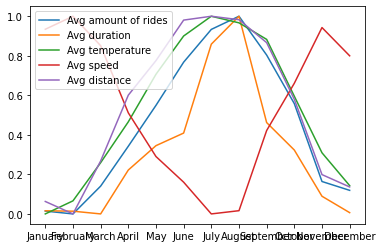

In [ ]:
#plotting the normalized rides_per_month, avg_duration_per_month and the avg_temp_per_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x = months
y1 = rides_per_month_norm
y2 = duration_per_month_norm
y3 = avg_temp_norm
y4 = avg_speed_per_month_norm
y5 = avg_distance_per_month_norm

plt.plot(x, y1, label="Avg amount of rides")
plt.plot(x, y2, label="Avg duration")
plt.plot(x, y3, label="Avg temperature")
plt.plot(x, y4, label="Avg speed")
plt.plot(x, y5, label="Avg distance")

plt.legend(loc="upper left")

plt.show()

## Analysis of the features in dependence of the week

### Extract week day as String and numeral from start time

In [ ]:
chicago_set['day_of_week_name'] = chicago_set['start_time'].dt.day_name()
chicago_set['day_of_week'] = chicago_set['start_time'].dt.dayofweek
chicago_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,day_of_week_name,day_of_week
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,Tuesday,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,Tuesday,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,Tuesday,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,Tuesday,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,Tuesday,1


### Hot-encode weekday: turn number for day into boolean

In [ ]:
chicago_set['monday'] = np.where(chicago_set['day_of_week'] == 0, 1, 0) #[chicago_set['day_of_week'] == 1]
day = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
for i in range(0,6):
    chicago_set[day[i]] = np.where(chicago_set['day_of_week'] == i, 1, 0)
    
chicago_set.sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,day_of_week_name,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday
3610220,2019-11-20 17:14:29,2019-11-20 17:22:42,43,191,Michigan Ave & Washington St,Canal St & Monroe St,6101,Subscriber,0 days 00:08:13,Wednesday,2,0,0,1,0,0,0
3497637,2019-11-02 18:50:44,2019-11-02 19:02:16,142,289,McClurg Ct & Erie St,Wells St & Concord Ln,1245,Subscriber,0 days 00:11:32,Saturday,5,0,0,0,0,0,1
3808874,2019-12-29 09:41:37,2019-12-29 09:52:30,23,133,Orleans St & Elm St,Kingsbury St & Kinzie St,4237,Subscriber,0 days 00:10:53,Sunday,6,0,0,0,0,0,0
594213,2019-04-25 17:03:53,2019-04-25 17:18:47,51,99,Clark St & Randolph St,Lake Shore Dr & Ohio St,2783,Subscriber,0 days 00:14:54,Thursday,3,0,0,0,1,0,0
2575385,2019-08-29 16:15:18,2019-08-29 16:25:57,107,320,Desplaines St & Jackson Blvd,Loomis St & Lexington St,910,Subscriber,0 days 00:10:39,Thursday,3,0,0,0,1,0,0


### Connections between days of the week and user behavior

In [ ]:
rides_started_per_weekday = chicago_set['start_time'].groupby(chicago_set['start_time'].dt.day_name()).agg('count')
rides_started_per_weekday = rides_started_per_weekday / 52
# because there are 52 weeks per year
avg_duration_per_weekday = chicago_set.groupby(chicago_set['start_time'].dt.day_name())['duration'].mean()
avg_speed_per_weekday = chicago_set_merge.groupby(chicago_set['start_time'].dt.day_name())['speed'].mean()
avg_distance_per_weekday = chicago_set_merge.groupby(chicago_set['start_time'].dt.day_name())['distance'].mean()


In [ ]:
# Normalize ridea_started_per_weekday
range_rides_started_per_weekday = max(rides_started_per_weekday)-min(rides_started_per_weekday)
rides_started_per_weekday_norm = (rides_started_per_weekday - min(rides_started_per_weekday))/range_rides_started_per_weekday

# Normalize avg_duration_per_weekday
range_avg_duration_per_weekday = max(avg_duration_per_weekday)-min(avg_duration_per_weekday)
avg_duration_per_weekday_norm = (avg_duration_per_weekday - min(avg_duration_per_weekday))/range_avg_duration_per_weekday

# Normalize avg_speed_per_weekday
range_avg_speed_per_weekday = max(avg_speed_per_weekday)-min(avg_speed_per_weekday)
avg_speed_per_weekday_norm = (avg_speed_per_weekday - min(avg_speed_per_weekday))/range_avg_speed_per_weekday

# Normalize avg_distance_per_weekday
range_avg_distance_per_weekday = max(avg_distance_per_weekday)-min(avg_distance_per_weekday)
avg_distance_per_weekday_norm = (avg_distance_per_weekday - min(avg_distance_per_weekday))/range_avg_distance_per_weekday


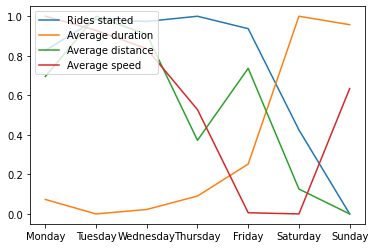

In [ ]:
x  = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

y1 = [rides_started_per_weekday_norm[1], rides_started_per_weekday_norm[5],rides_started_per_weekday_norm[6],
                           rides_started_per_weekday_norm[4],rides_started_per_weekday_norm[0],rides_started_per_weekday_norm[2],
                           rides_started_per_weekday_norm[3]]
y2 = [avg_duration_per_weekday_norm[1], avg_duration_per_weekday_norm[5],avg_duration_per_weekday_norm[6],
                           avg_duration_per_weekday_norm[4],avg_duration_per_weekday_norm[0],avg_duration_per_weekday_norm[2],
                           avg_duration_per_weekday_norm[3]]
y3 = [avg_distance_per_weekday_norm[1], avg_distance_per_weekday_norm[5],avg_distance_per_weekday_norm[6],
                           avg_distance_per_weekday_norm[4],avg_distance_per_weekday_norm[0],avg_distance_per_weekday_norm[2],
                           avg_distance_per_weekday_norm[3]]
y4 = [avg_speed_per_weekday_norm[1], avg_speed_per_weekday_norm[5],avg_speed_per_weekday_norm[6],
                           avg_speed_per_weekday_norm[4],avg_speed_per_weekday_norm[0],avg_speed_per_weekday_norm[2],
                           avg_speed_per_weekday_norm[3]]


plt.plot(x, y1, label="Rides started")
plt.plot(x, y2, label="Average duration")
plt.plot(x, y3, label="Average distance")
plt.plot(x, y4, label="Average speed")
plt.legend(loc="upper left")

plt.show()

Wee see that during the week we have nearly constantly around 11k rides per weekday, during the weekend this number drops to around 9k rides per day with a low on Sundays.

Although we see that there are less rides on the weekend, the average duration is ca. 50% higher than during the week.
In the next step, we want to draw both graphs in one diagram and also change the sequence from alphabetically to standard Mo-Sun view. Therefore, we normalize our data with this formula: xnormalized = (x - xminimum) / range of x .

In the next step, we'll change the sequence. Python ordered the data alphabetically, but for us humans it's more intuitive to have a week from "Monday" till "Sunday" (at least in Europe).

## Analysis of the features in dependence of the hour

In [ ]:
rides_per_hour = chicago_set['start_time'].groupby(chicago_set['start_time'].dt.hour).agg('count')
avg_duration_per_hour = chicago_set.groupby(chicago_set['start_time'].dt.hour)['duration'].mean()
avg_speed_per_hour = chicago_set_merge.groupby(chicago_set['start_time'].dt.hour)['speed'].mean()
avg_distance_per_hour = chicago_set_merge.groupby(chicago_set['start_time'].dt.hour)['distance'].mean()


We see two spikes of usage during the day: our services is getting used the most between 5am and 10 am and between 3pm and 7pm. We can assume that our users rent our bikes to get to the university/school/workplace or home. 

In [ ]:
avg_duration_per_hour = chicago_set.groupby(chicago_set['start_time'].dt.hour)['duration'].mean()
# print(avg_duration_per_hour)
# plt.plot(avg_duration_per_hour)

We see a peak between 3 and 4am, so maybe drunk people need to get home and rely on our service.

In [ ]:
# normalize the rides_per_hour
range_rides_per_hour = max(rides_per_hour)-min(rides_per_hour)
rides_per_hour_norm = (rides_per_hour - min(rides_per_hour))/range_rides_per_hour

# normalize the average_duration_per_hour
range_avg_duration_per_hour = max(avg_duration_per_hour)-min(avg_duration_per_hour)
duration_per_hour_norm = (avg_duration_per_hour - min(avg_duration_per_hour))/range_avg_duration_per_hour

# normalize the avg_speed_per_hour
range_avg_speed_per_hour = max(avg_speed_per_hour)-min(avg_speed_per_hour)
avg_speed_per_hour_norm = (avg_speed_per_hour - min(avg_speed_per_hour))/range_avg_speed_per_hour

# normalize the avg_distance_per_hour
range_avg_distance_per_hour = max(avg_distance_per_hour)-min(avg_distance_per_hour)
avg_distance_per_hour_norm = (avg_distance_per_hour - min(avg_distance_per_hour))/range_avg_distance_per_hour


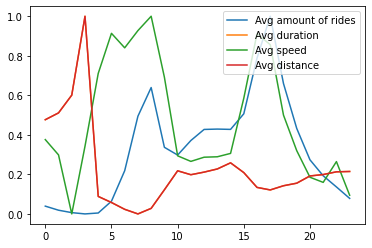

In [ ]:
#plotting the normalized rides_per_month, avg_duration_per_month and the avg_temp_per_month

y1 = rides_per_hour_norm
y2 = duration_per_hour_norm
y3 = avg_speed_per_hour_norm
y4 = avg_distance_per_hour_norm

plt.plot(y1, label="Avg amount of rides")
plt.plot(y2, label="Avg duration")
plt.plot(y3, label="Avg speed")
plt.plot(y2, label="Avg distance")

plt.legend(loc="upper right")

plt.show()

## Analysis of the geographical data

### Visualizing the amount of trips started/ended per station

This should help us to improve the understanding of the location data before we'll visualize this in a heatmap in the further steps.

In [ ]:
amount_of_start_stations = len(chicago_set['start_station_id'].unique())
print(amount_of_start_stations)

amount_of_end_stations = len(chicago_set['end_station_id'].unique())
print(amount_of_end_stations)

616
617


In [ ]:
chicago_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,day_of_week_name,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,Tuesday,1,0,1,0,0,0,0
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,Tuesday,1,0,1,0,0,0,0
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,Tuesday,1,0,1,0,0,0,0
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,Tuesday,1,0,1,0,0,0,0
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,Tuesday,1,0,1,0,0,0,0


In [ ]:
rides_started_per_station = chicago_set['start_station_id'].groupby(chicago_set['start_station_id']).agg('count')
rides_ended_per_station = rides_ended_per_station = chicago_set['end_station_id'].groupby(chicago_set['end_station_id']).agg('count')

avg_duration_per_start_station = chicago_set.groupby(chicago_set['start_station_id'])['duration'].mean()
avg_duration_per_end_station = chicago_set.groupby(chicago_set['end_station_id'])['duration'].mean()

avg_distance_per_start_station = chicago_set.groupby(chicago_set['start_station_id'])['distance'].mean()
avg_distance_per_end_station = chicago_set.groupby(chicago_set['end_station_id'])['distance'].mean()

avg_speed_per_start_station = chicago_set.groupby(chicago_set['start_station_id'])['speed'].mean()
avg_speed_per_end_station =  chicago_set.groupby(chicago_set['end_station_id'])['speed'].mean()


KeyError: ignored

In [ ]:
# normalize the rides_per_station
range_rides_started_per_station = max(rides_started_per_station)-min(rides_started_per_station)
rides_started_per_station_norm = (rides_started_per_station - min(rides_started_per_station))/range_rides_started_per_station

range_rides_ended_per_station = max(rides_ended_per_station)-min(rides_ended_per_station)
rides_ended_per_station_norm = (rides_ended_per_station - min(rides_ended_per_station))/range_rides_ended_per_station


# normalize the average_duration_per_month
range_avg_duration_per_start_station = max(avg_duration_per_start_station)-min(avg_duration_per_start_station)
avg_duration_per_start_station_norm = (avg_duration_per_start_station - min(avg_duration_per_start_station))/range_avg_duration_per_start_station

range_avg_duration_per_end_station = max(avg_duration_per_end_station)-min(avg_duration_per_end_station)
avg_duration_per_end_station_norm = (avg_duration_per_end_station - min(avg_duration_per_end_station))/range_avg_duration_per_end_station



In [ ]:
y1 = rides_started_per_station_norm
y2 = rides_ended_per_station_norm
plt.plot(y1, label="Rides started per station")
plt.plot(y2, label="Rides ended per station")
plt.legend(loc="upper left")

plt.show()

In [ ]:
y3 = avg_duration_per_start_station_norm
y4 = avg_duration_per_end_station_norm

plt.plot(y3, label="Avg duration per start station")
plt.plot(y4, label="Avg duration per end station")

plt.legend(loc="upper left")

plt.show()

There are 616 unique start_station_ids and 617 end_station_ids. We visualized the amount of rides started/ended per stations and see that some stations are more popular than others. We will analyze this investigation in the further steps and visualize it with a heatmap.

## Clustering our complete dataset

In [ ]:
chicago_set.info()

Because it's not possible to cluster timestamp data, we'll add three more columns which will include the information month, hour and minute of the ride.

In [ ]:
chicago_set['start_month'] = pd.to_datetime(chicago_set['start_time']).dt.month
chicago_set['start_hour'] = pd.to_datetime(chicago_set['start_time']).dt.hour
chicago_set['start_minute'] = pd.to_datetime(chicago_set['start_time']).dt.minute

In [ ]:
#hot-encode user_type


In [ ]:
def temp_at_time():
  if()

months
hours


chicago_set['avg_temp'] = 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
x = chicago_set.iloc[:, [3,4,8,9,11]]

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()